In [1]:
import numpy as np
import get_data as gd
import matplotlib.pyplot as plt

from matplotlib import style
style.use("fivethirtyeight")

In [2]:
points = gd.run()

DATA loaded with size :  100


In [3]:
def compute_total_error(m, b):
    totalError = 0
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        
        totalError += (y-(m*x+b))**2
    return totalError/float(len(points))

def total_error(points_):
    return compute_total_error(points_[0], points_[1])

In [4]:
def compute_jacobian(point_pair, h = 1e-5):
    n = len(point_pair)
    jacobian = np.zeros(n)
    for i in range(n):
        x_i = np.zeros(n)
        x_i[i] += h 
        jacobian[i] = (total_error(point_pair+x_i) - total_error(point_pair))/h
    return jacobian


In [5]:
def compute_hessian(point_pair, h = 1e-5): 
    n = len(point_pair)
    hessian = np.zeros((n,n))
    for i in range(n):
        x_i = np.zeros(n)
        x_i[i] += h
        hessian[i] = (compute_jacobian(point_pair+x_i) - compute_jacobian(point_pair))/h 
    return hessian


In [6]:
def calc_newton(init_points, max_iter = 10000, e = 1e-5):
    point_pair_arr = np.zeros((max_iter, len(init_points)))
    point_pair_arr[0] = init_points
    opt_val = None
    for i in range(max_iter):
        jacobian = compute_jacobian(point_pair_arr[i])
        hessian = compute_hessian(point_pair_arr[i]) 
        point_pair_arr[i+1] = point_pair_arr[i] - np.dot(np.linalg.pinv(hessian), jacobian)
        print('New m is %.2f and new b is %.2f'%(point_pair_arr[i,0], point_pair_arr[i,1]))
        opt_val = point_pair_arr[i+1]
        if np.abs(total_error(point_pair_arr[i+1]) - total_error(point_pair_arr[i])) < e:
            print('Optimal m is %.2f and Optimal b is %.2f'%(point_pair_arr[i+1,0], point_pair_arr[i+1,1]))
            break
    return opt_val

In [7]:
def plot_data(m, b):
    X = points[:,0]
    Y = points[:,1]
    plt.plot(X, Y, 'bo')
    plt.plot(X, m * X + b)
    plt.axis([0,1.5* max(X), 0, 1.3 * max(Y)])
    plt.title("Best fit line.")
    plt.text(10, 130, "m="+str(round(m,4))+"  b="+str(round(b,4)) + " error="+str(compute_total_error(m,b)))
    plt.show()
    return

In [8]:
def main():
    init_points = np.array([0.0, 1.0])
    newton_points = calc_newton(init_points, 100)
    print('points = ', newton_points[0],' and ',newton_points[1], 'and the error : ', total_error(newton_points))
    plot_data(newton_points[0], newton_points[1])
    

New m is 0.00 and new b is 1.00
New m is 1.36 and new b is 6.27
New m is 1.32 and new b is 7.99
Optimal m is 1.32 and Optimal b is 8.00
points =  1.32229944108  and  7.99746143767 and the error :  110.257385094


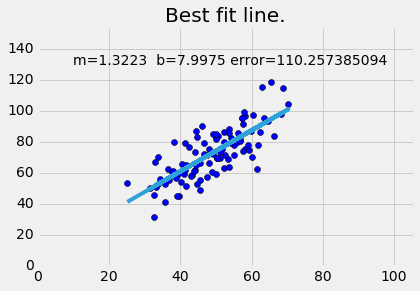

In [9]:
main()